In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from collections import Counter
from collections import OrderedDict
from operator import itemgetter
%matplotlib inline

## Uniform and Gaussian

In [2]:
def rand_uniform(high, low, sample_size, fig=False):
    
    np.random.seed()
    samples = np.random.rand(sample_size)
    
    if fig:
        plt.figure(figsize=(10,8))
        plt.subplot(221)
        plt.hist(samples,bins=20)
    
    samples = low + ((high - low) * samples)
    
    if fig:
        plt.subplot(222)
        plt.hist(samples,bins=20)
    return samples

array([1.86937408, 1.07003166, 1.94503934, ..., 1.93112922, 2.50813361,
       2.77020064])

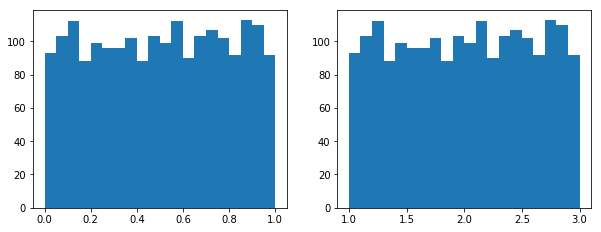

In [3]:
rand_uniform(3,1,2000, fig=True)

In [19]:
def rand_normal(mu, sigma, sample_size):
 
    np.random.seed()
    sample_x = np.zeros(sample_size)
    sample_y = np.zeros(sample_size)
    count = 0
    while count < sample_size:
        x = rand_uniform(-3,3,1)[0]
        y = rand_uniform(0,3,1)[0]
        y_ = norm.pdf(x, loc=mu, scale = sigma)

        if y<y_:
            sample_x[count]=x
            sample_y[count]=y_
            count += 1      
#     hinfo = np.histogram(sample_x,30)
#    plt.hist(sample_x,bins=30, label=u'Samples')
    plt.bar(sample_x,sample_y, label=u'Samples') 
        #print(y_)

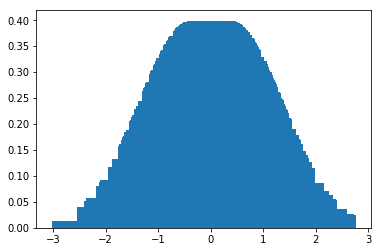

In [20]:
rand_normal(0,1,200)


## 2d Gaussian

In [9]:
def rand_normal_2d(mu, sigma, sample_size):
 
    np.random.seed()
    sample_x1 = np.zeros(sample_size)
    sample_x2 = np.zeros(sample_size)
    count = 0
    while count < sample_size:
        x1 = rand_uniform(-3,3,1)[0]
        x2 = rand_uniform(-3,3,1)[0]
        y = rand_uniform(0,3,1)[0]
       # y = rand_uniform(-3,3,1)[0]
        y_ = multivariate_normal.pdf([x1,x2], mean=mu, cov = sigma)
        
        if y<y_:
            sample_x1[count]=x1
            sample_x2[count]=x2
            count += 1
            
    plt.xlim(xmin=-6,xmax=6)
    plt.ylim(ymin=-6,ymax=6)
    plt.scatter(sample_x1, sample_x2, marker='x', alpha=0.8)        
        #print(y_)
    
    #plt.plot(y_,'.')

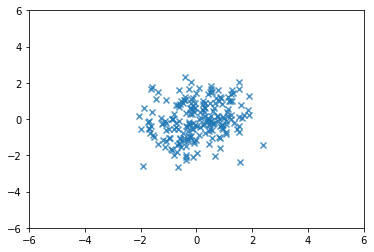

In [10]:
rand_normal_2d([0,0],[[1,0.1],
                      [0.1,1]],200)

## Steven's Method

In [12]:
def stevens_sampling(sample_size, pop_size, mean, cov):
    np.random.seed()
    samples = np.random.normal(loc=mean, scale=cov, size=pop_size)
    samples_pdf = norm.pdf(loc=mean, scale=cov , x=samples)
    
    #sort on pdf
    sorted_pdf = np.sort(samples_pdf)[::-1]
    sorted_sample = samples[np.argsort(samples_pdf)[::-1]]

    plt.figure(figsize=(16,10))
    plt.subplot(221)
    plt.bar(samples, samples_pdf, width = 0.05)
    
    plt.subplot(222)
    x = range(pop_size)
    plt.bar(x,sorted_pdf, width=0.6)
    
    buckets = int(pop_size/sample_size)

    #normalized pdfs
    norm_prob =[]
    for i in range(buckets):
        norm_prob.append(np.average(sorted_pdf[i*sample_size:(i+1)*sample_size-1]))

    #normalize buckets
    for i, val in enumerate(norm_prob):
        sorted_pdf[i*sample_size:(i+1)*sample_size] = val

    plt.subplot(223)
    x = range(pop_size)
    plt.bar(x,sorted_pdf, width=0.8)
     
    #choose buckets at random with replcement and count
    buckets_choice = Counter(np.random.choice(buckets, size=sample_size, replace=True))

    print("bucket_choice: ", buckets_choice)
    #sample without replacement
    pick=[]
    for key, value in buckets_choice.most_common():
        pick.extend(np.random.choice(sorted_sample[key*sample_size:(key+1)*sample_size], size=int(value), replace=False))
    
    print(len(pick))
    plt.subplot(224)
    x = range(pop_size)
    z = np.where(np.isin(sorted_sample, pick))
    plt.bar(x,sorted_pdf, width=0.8) 
    plt.bar(z[0],sorted_pdf[z], width=0.8, color='red')
            
    print("Sampling without replcement: ", pick)

bucket_choice:  Counter({5: 4, 14: 2, 13: 2, 6: 2, 4: 2, 10: 1, 8: 1, 9: 1, 0: 1, 11: 1, 7: 1, 1: 1, 12: 1})
20
Sampling without replcement:  [0.4911002222979774, 0.46797416918450857, -0.4463735263620758, -0.4578554320677842, 1.8439520916616747, -1.962963271863766, 1.6199792792788603, -1.4986981130755097, -0.5515530151953382, -0.6249303594558862, 0.40503864573596104, 0.3987732769766412, 1.090803480078836, 0.8649882772451016, 0.9541256641972259, -0.01658078383771299, 1.294794429623676, -0.6720024947023142, -0.1217425735129745, 1.416042852068954]


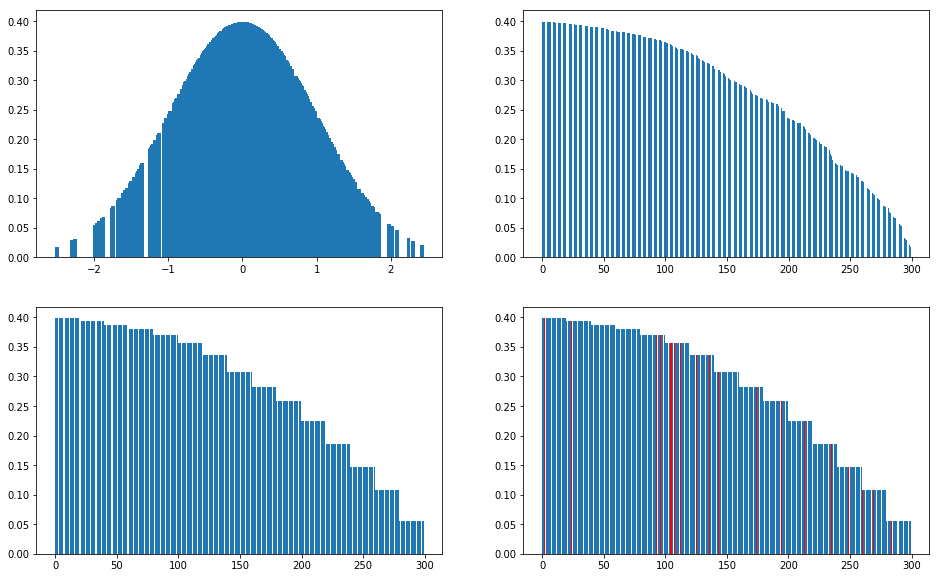

In [14]:
stevens_sampling(20, 300, 0 , 1)